# Lab 03: Logistic Regression

In this lab, we will implement logistic regression using Scikit-Learn to classify diabetes outcomes based on the provided dataset.

## Import Required Libraries

Import libraries such as numpy, pandas, matplotlib, seaborn, and sklearn.

In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

## Load and Explore the Dataset

Load the diabetes dataset using pandas, display the first few rows, and check for missing values.

**Display the first few rows**

In [23]:
# Load the dataset
file_path = "diabetes.csv"
print(f"Loading data from {file_path}")
df = pd.read_csv(file_path)


# Display the first few rows
print("First few rows of the dataset:")
df.head()



Loading data from diabetes.csv
First few rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Display the last few rows**

In [11]:
# Display the last few rows
print("\nLast few rows of the dataset:")
df.tail(3)

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().count())



Last few rows of the dataset:

Missing values in the dataset:
Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64


**Check info**

In [20]:
# Check info
print("\ninfo of this dataset:")
df.info()



info of this dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Summary statistics

In [21]:
# Summary statistics
print("\nSummary statistics:")
df.describe()



Summary statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Preprocessing

Handle missing values, normalize the data, and split it into training and testing sets using Scikit-Learn utilities.

**Handle missing values**

In [26]:
# Handle missing values (if any)
# In this dataset, missing values are represented as zeros in certain columns
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_with_zeros:
    df[column].replace(0,df[column].mean(),inplace = True)

C:\Users\1212a\AppData\Local\Temp\ipykernel_11708\1780818870.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace(0,df[column].mean(),inplace = True)


In [27]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


**Normalize the data**

In [30]:
# Normalize the data
scaler = StandardScaler()


#drop target variable from X
X = df.drop('Outcome',axis = 1)

#create "y" containing outcome target variable
y = df['Outcome']

X_scaled = scaler.fit_transform(X)

**Split the data into training and testing sets**

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (614, 8)
Testing set size: (154, 8)


## Visualizing the Data

Use seaborn to create pairplots and correlation heatmaps to understand relationships between features.

**Pairplot**

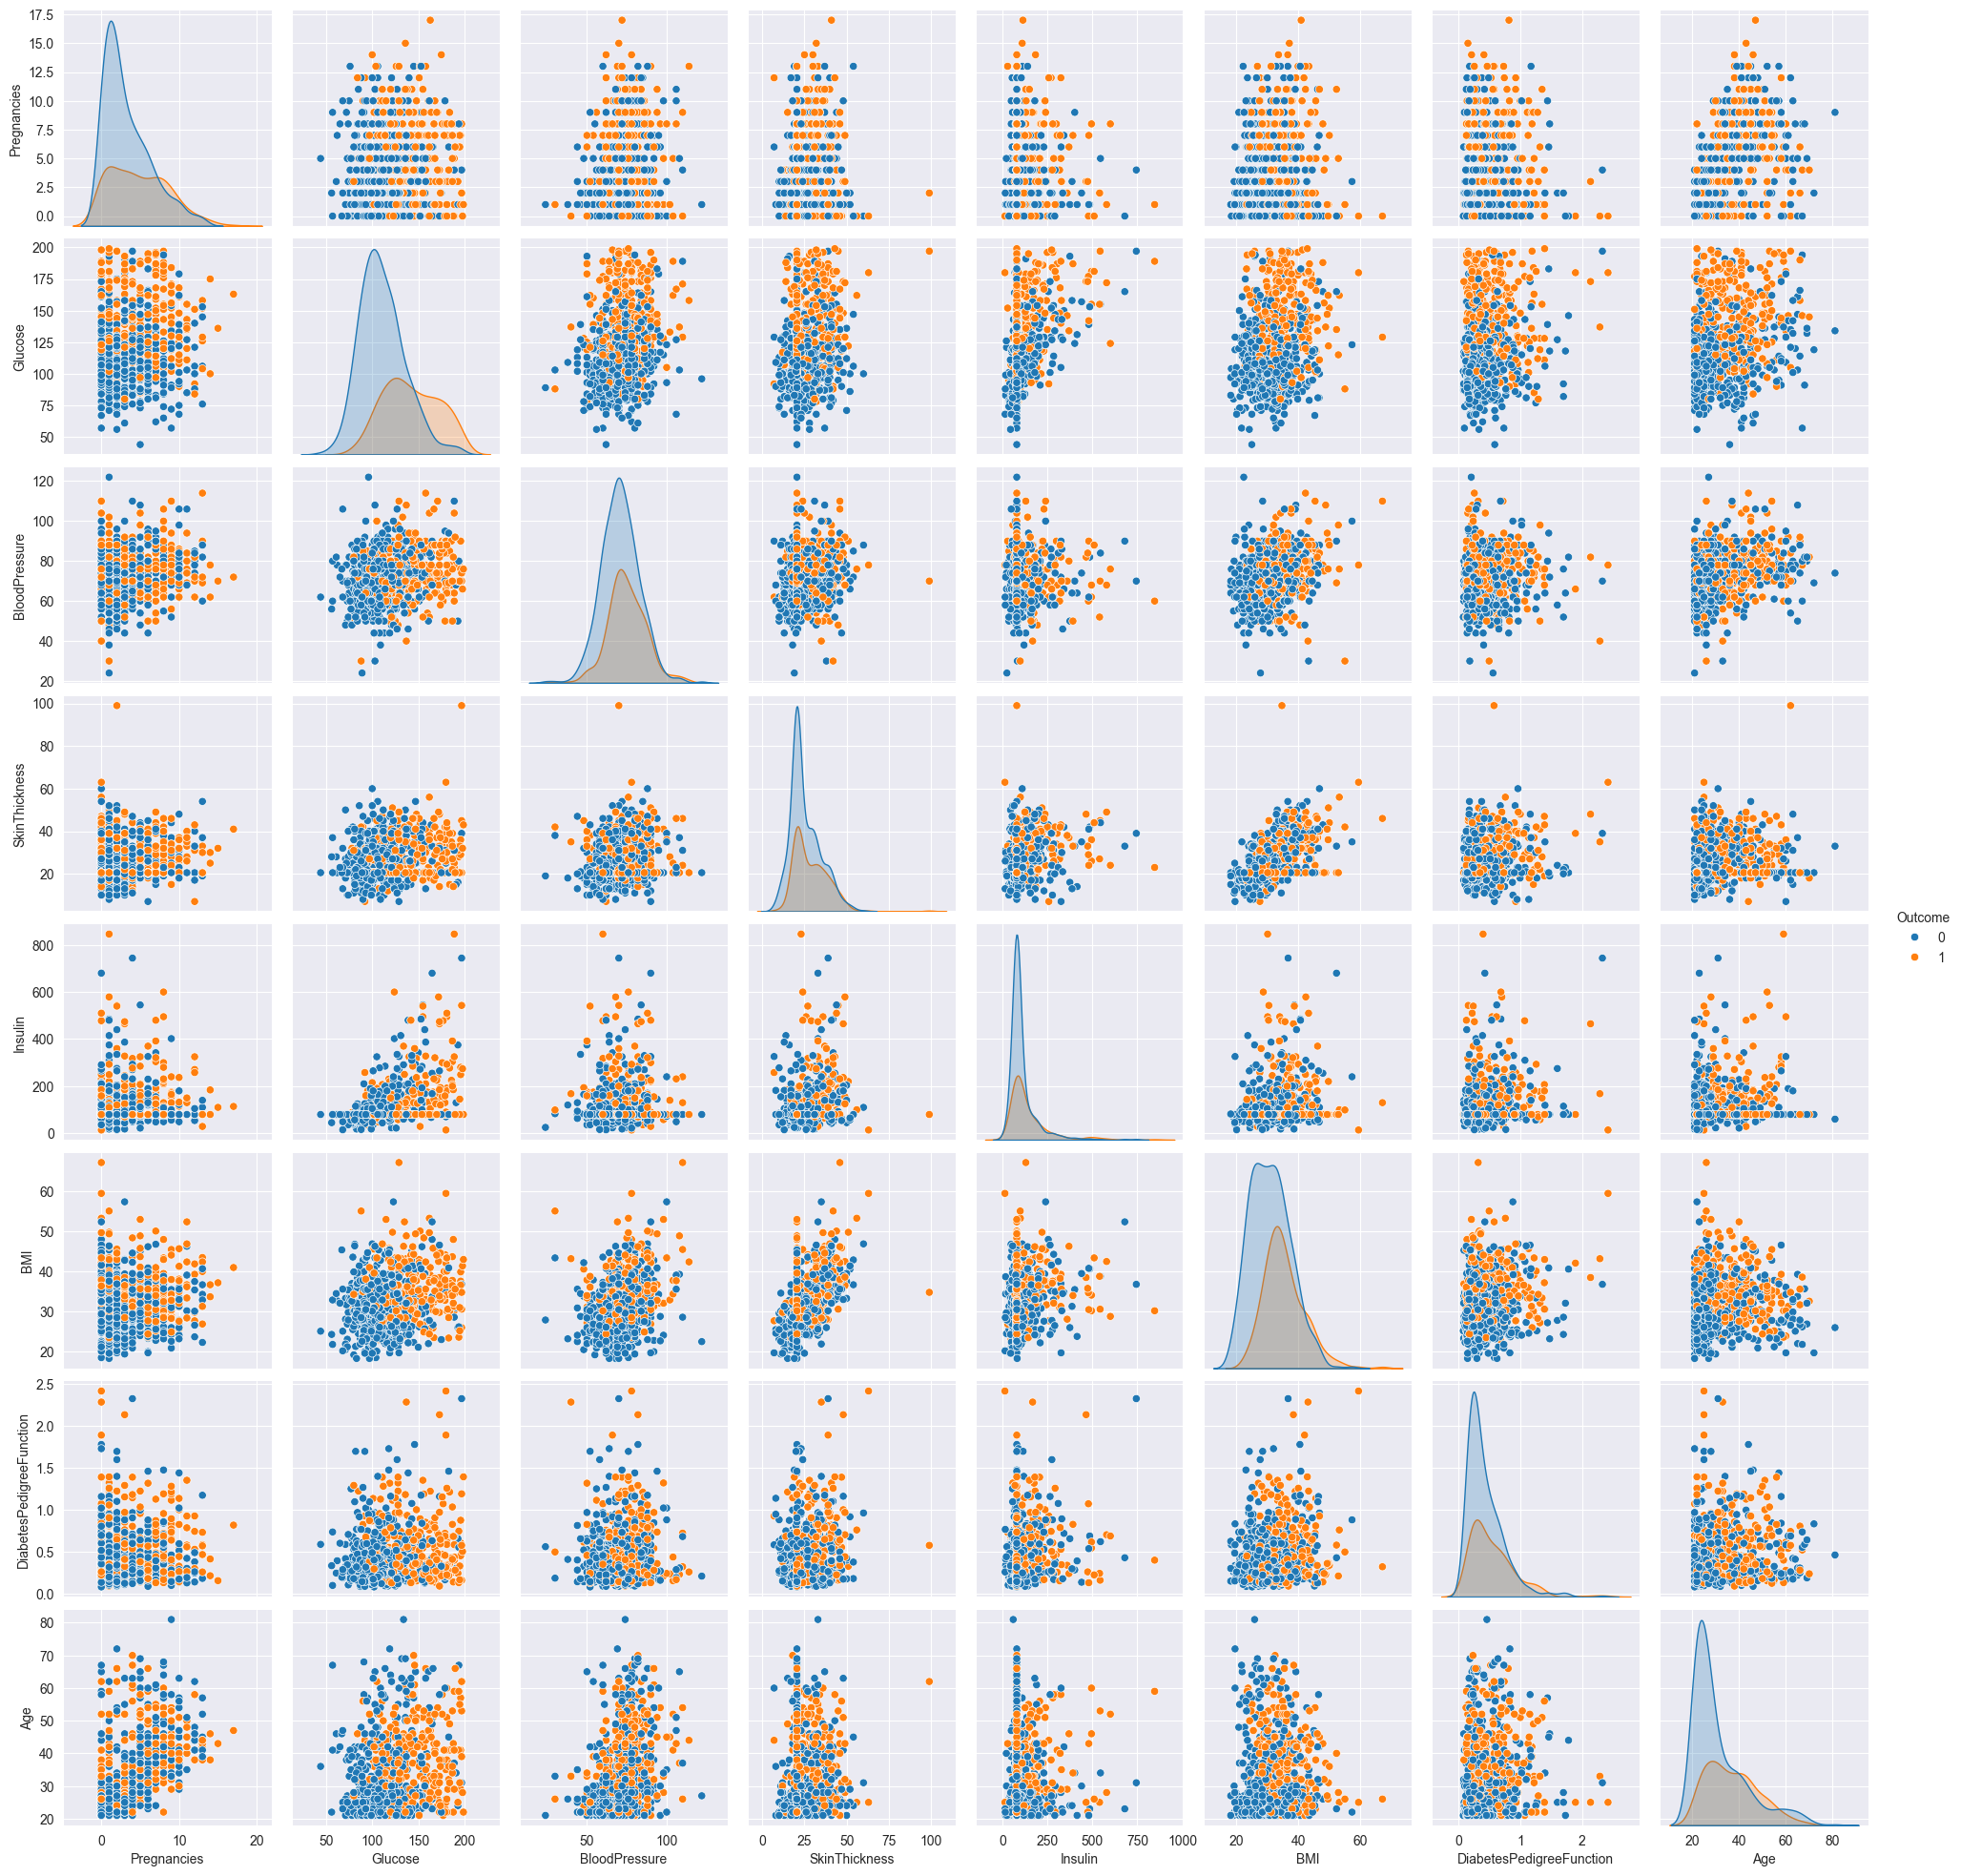

In [38]:
sns.pairplot(df,hue = 'Outcome',diag_kind='kde')
plt.show()

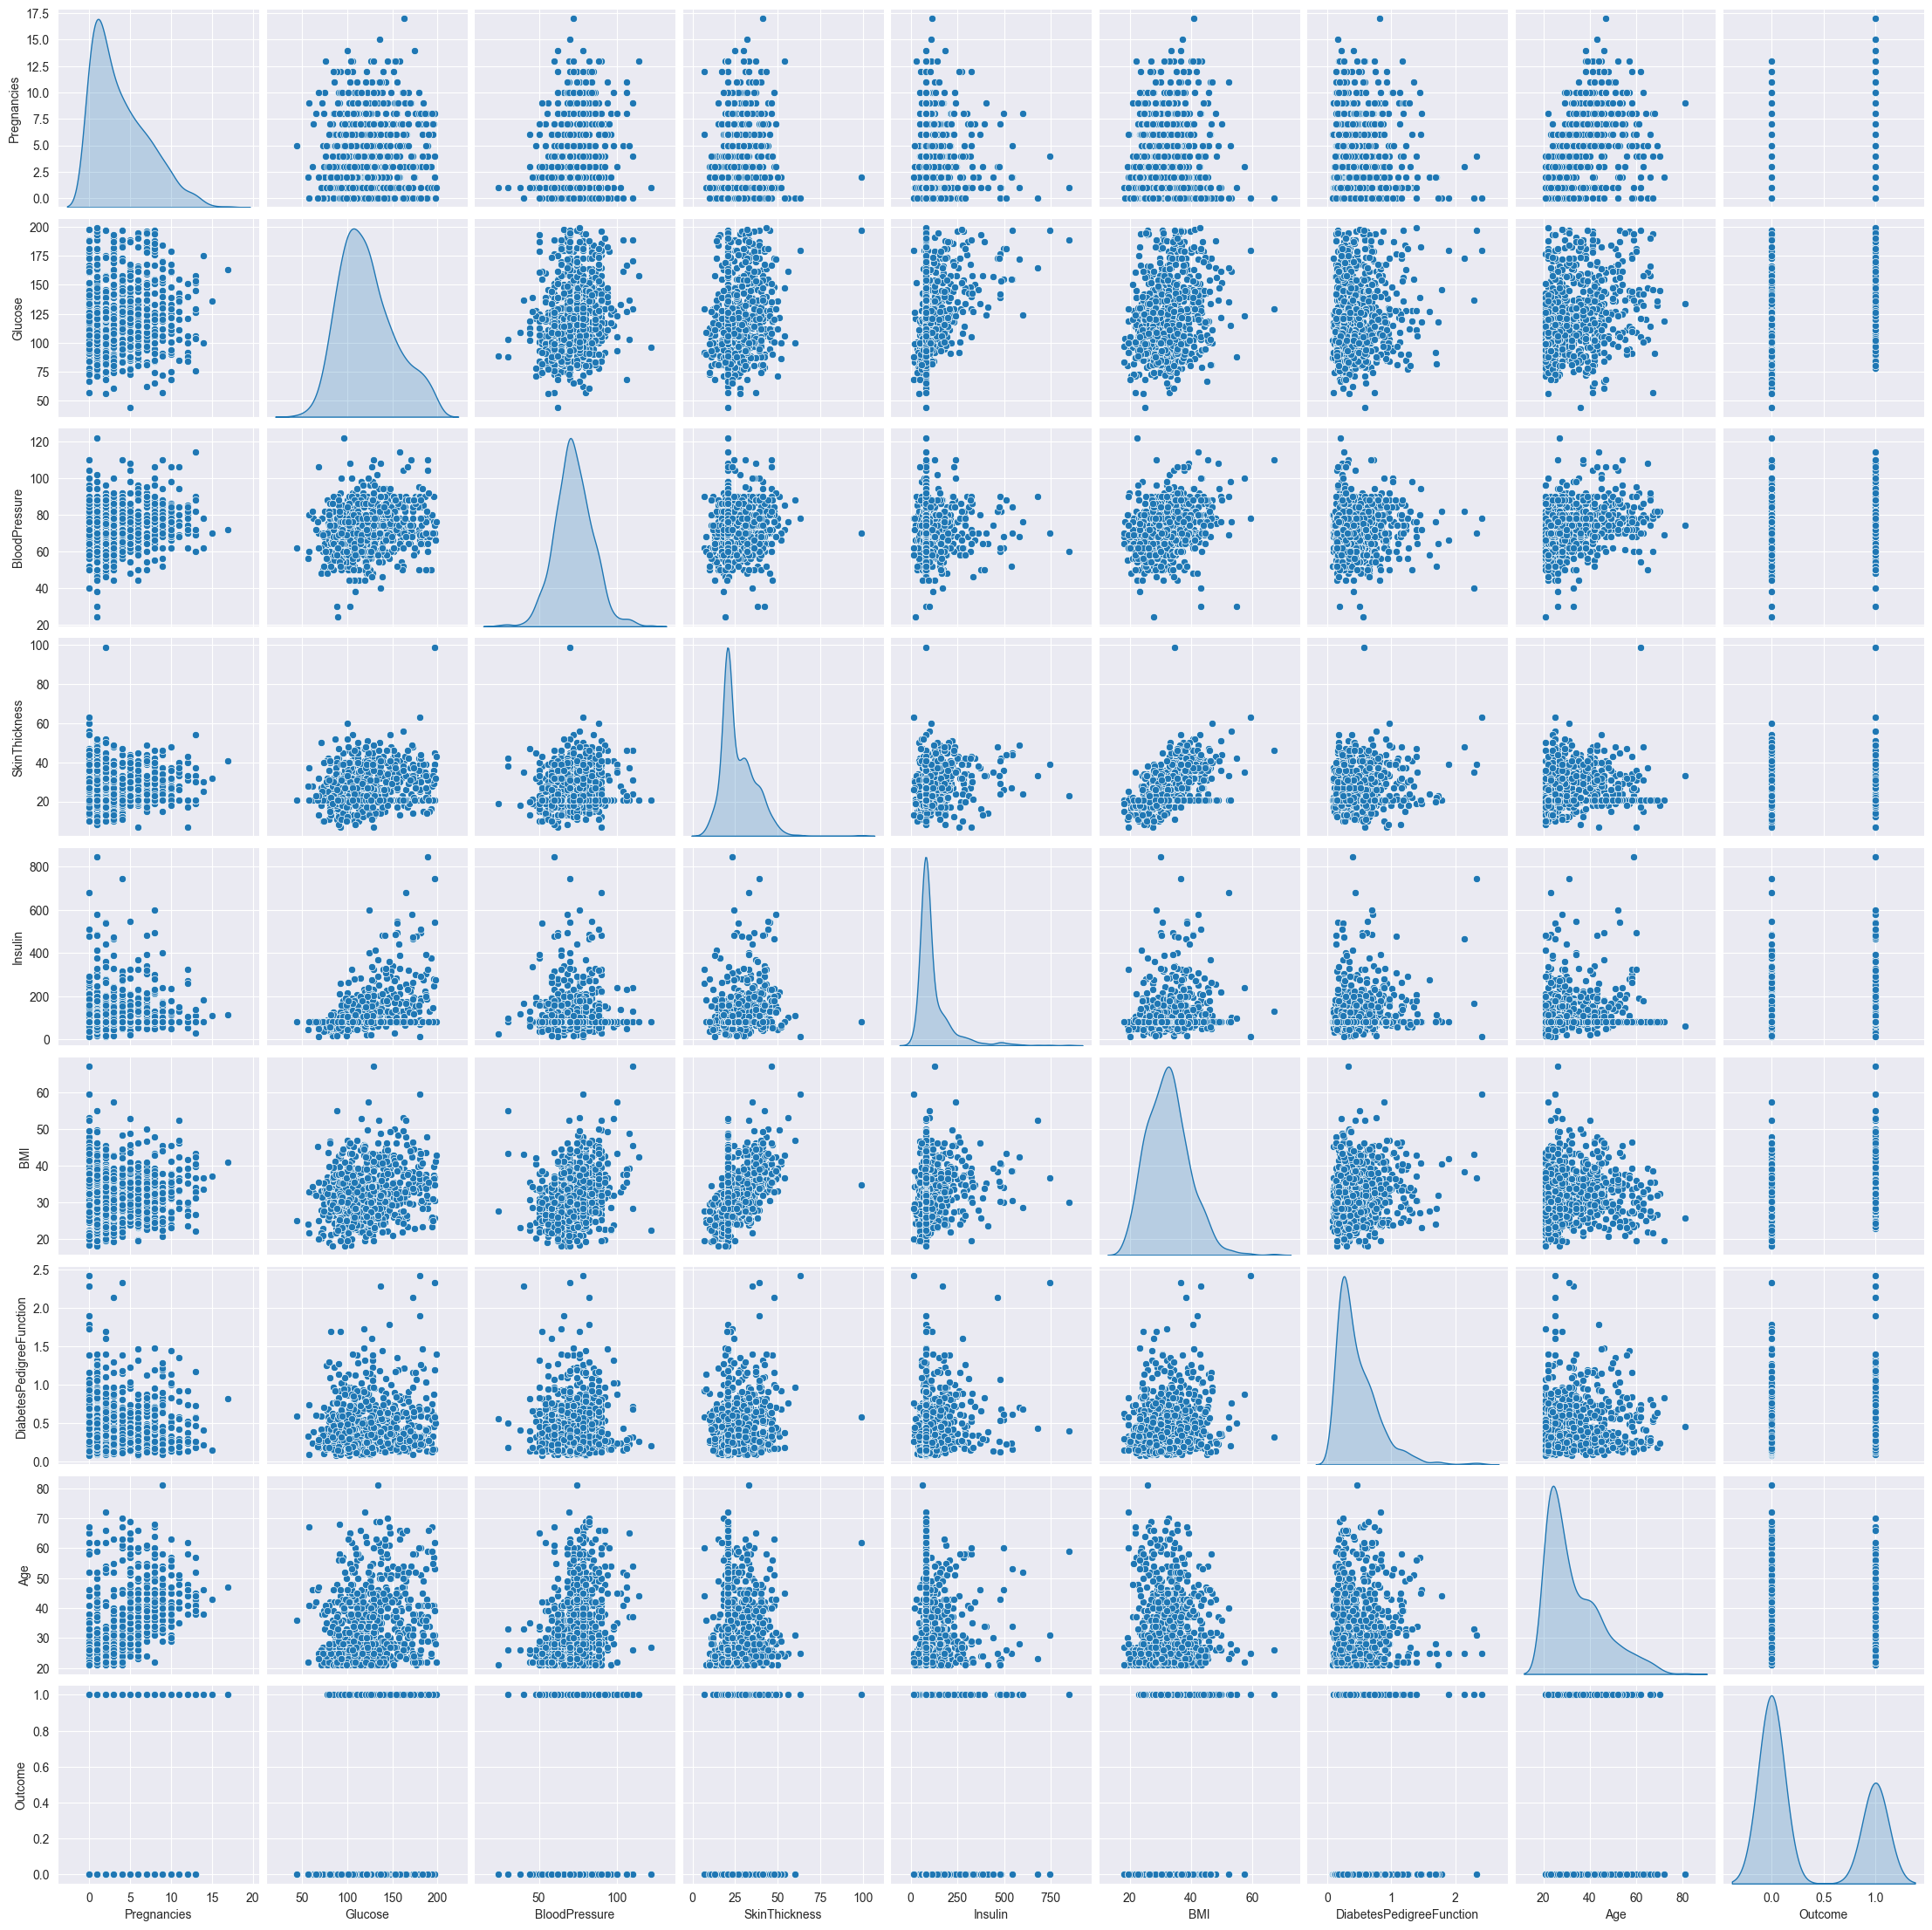

In [36]:
# Create a pair plot to see relationships between features
sns.pairplot(df,diag_kind='kde')
# sns.pairplot(df, x_vars=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'],
#              y_vars=['Outcome'])
plt.show()

**Correlation heatmap**

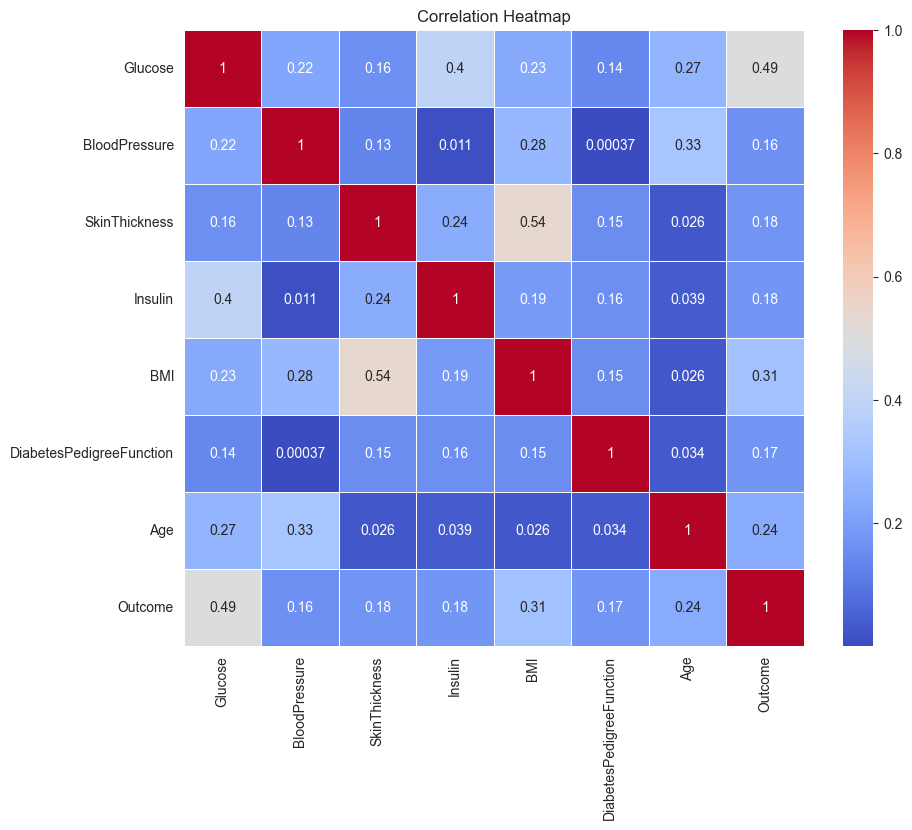

In [54]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction','Age','Outcome']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Plot the relationship between "Glucose" and "Insulin" using a scatter plot.**

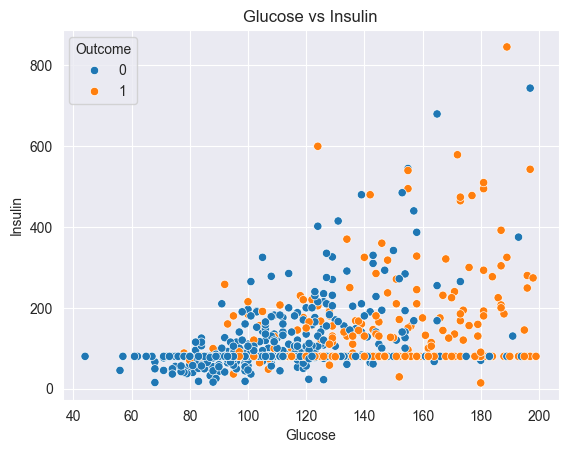

In [55]:
# Plot the relationship between "Glucose" and "Insulin" using a scatter plot.
sns.scatterplot(data=df, x="Glucose", y="Insulin", hue="Outcome")
plt.title("Glucose vs Insulin")
plt.show()


**Plot the relationship between "BMI" and "SkinThickness" using a scatter plot**

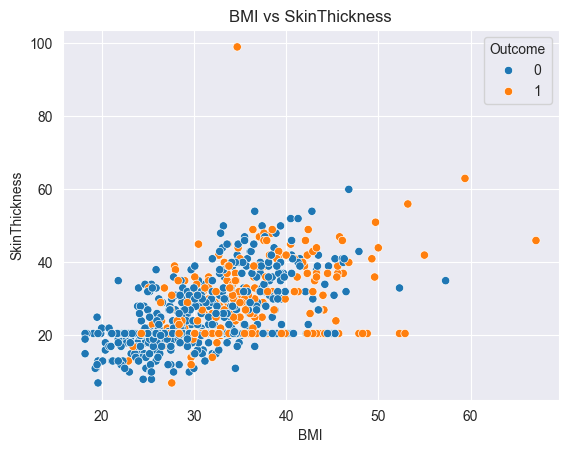

In [56]:
# Plot the relationship between "BMI" and "SkinThickness" using a scatter plot.
sns.scatterplot(data=df, x="BMI", y="SkinThickness", hue="Outcome")
plt.title("BMI vs SkinThickness")
plt.show()

**Plot the relationship between "_" and "_" using a scatter plot.**

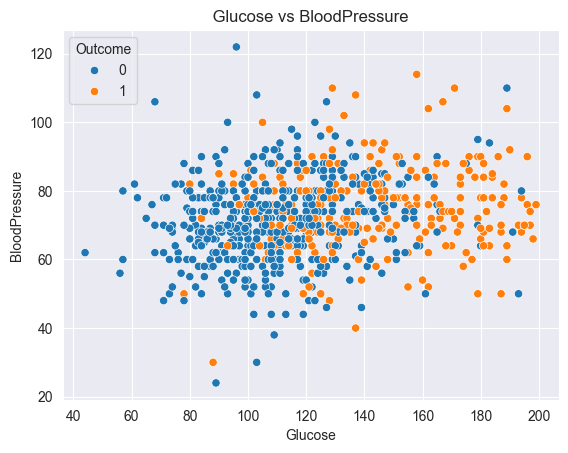

In [57]:
# # Plot the relationship between "_" and "_" using a scatter plot.
sns.scatterplot(data=df, x="Glucose", y="BloodPressure", hue="Outcome")
plt.title(" Glucose vs BloodPressure ")
plt.show()


**Plot the relationship between "BMI" and "SkinThickness" using a scatter plot**

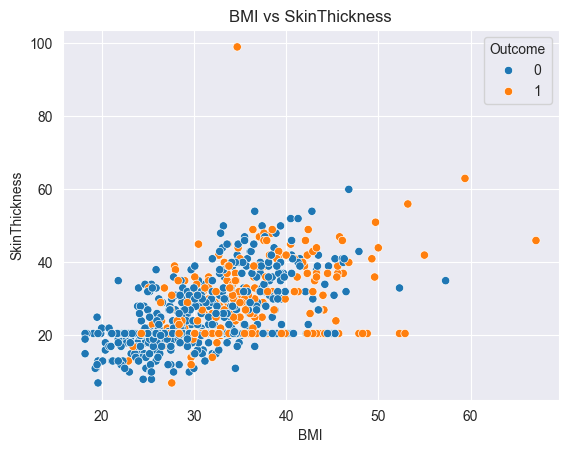

In [48]:
# Plot the relationship between "BMI" and "SkinThickness" using a scatter plot.
sns.scatterplot(data=df, x="BMI", y="SkinThickness", hue="Outcome")
plt.title("BMI vs SkinThickness")
plt.show()

## Train Logistic Regression Model

Train a logistic regression model using Scikit-Learn's LogisticRegression class.

In [49]:
# Train logistic regression model using Scikit-Learn
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

## Evaluate the Model

Calculate accuracy, precision, recall, and F1-score for the trained model using Scikit-Learn's metrics.

In [64]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [52]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7662
Precision: 0.6863
Recall: 0.6364
F1-score: 0.6604


## Make Predictions

Use the trained model to make predictions on new data points.

In [66]:
# Example new data points
X_small = np.array([[10,115,0,0,0,35.3,0.134,29],[2,197,70,45,543,30.5,0.158,53],[10,168,74,0,0,38,0.537,34],[10,139,80,0,0,27.1,1.441,57],[1,189,60,23,846,30.1,0.398,59]])

# Normalize the new data

new_data_scaled = scaler.fit_transform(X_small)

# Make predictions
new_predictions = model.predict(new_data_scaled)

print("Predictions for new data points:", new_predictions)

Predictions for new data points: [0 0 1 0 0]


## Assignment: Logistic Regression on Heart Failure Dataset

For this assignment, you will apply logistic regression to the **Heart Failure Dataset**. The dataset contains information about patients and whether they experienced heart failure.

### Steps:
1. Download the dataset from [Heart Failure Dataset on Kaggle](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data).
2. Load the dataset using pandas and explore it (e.g., check for missing values, data types, etc.).
3. Preprocess the data (e.g., handle missing values, normalize features, etc.).
4. Split the data into training and testing sets.
5. Train a logistic regression model using Scikit-Learn.
6. Evaluate the model using metrics such as accuracy, precision, recall, and F1-score.
7. Visualize the confusion matrix.
8. Make predictions on new data points.

### Deliverables:
- Submit a Jupyter notebook with your code, outputs, and explanations.
- Include visualizations where appropriate (e.g., correlation heatmap, confusion matrix).
- Provide a brief summary of your findings and the performance of your model.